# Speech

Increasingly, we expect to be able to communicate with artificial intelligence (AI) systems by talking to them, often with the expectation of a spoken response.

![A robot speaking](./images/speech.jpg)

*Speech recognition* (an AI system interpreting spoken language) and *speech synthesis* (an AI system generating a spoken response) are the key components of a speech-enabled AI solution.

## Create a Cognitive Services resource

To build software that can interpret audible speech and respond verbally, you can use the **Speech** cognitive service, which provides a simple way to transcribe spoken language into text and vice-versa.

If you don't already have one, use the following steps to create a **Cognitive Services** resource in your Azure subscription:

> **Note**: If you already have a Cognitive Services resource, just open its **Quick start** page in the Azure portal and copy its key and endpoint to the cell below. Otherwise, follow the steps below to create one.

1. In another browser tab, open the Azure portal at https://portal.azure.com, signing in with your Microsoft account.
2. Click the **&#65291;Create a resource** button, search for *Cognitive Services*, and create a **Cognitive Services** resource with the following settings:
    - **Subscription**: *Your Azure subscription*.
    - **Resource group**: *Select or create a resource group with a unique name*.
    - **Region**: *Choose any available region*:
    - **Name**: *Enter a unique name*.
    - **Pricing tier**: S0
    - **I confirm I have read and understood the notices**: Selected.
3. Wait for deployment to complete. Then go to your cognitive services resource, and on the **Overview** page, click the link to manage the keys for the service. You will need the key and location to connect to your cognitive services resource from client applications.

### Get the Key and Location for your Cognitive Services resource

To use your cognitive services resource, client applications need its authentication key and location:

1. In the Azure portal, on the **Keys and Endpoint** page for your cognitive service resource, copy the **Key1** for your resource and paste it in the code below, replacing **YOUR_COG_KEY**.
2. Copy the **Location** for your resource and and paste it in the code below, replacing **YOUR_COG_LOCATION**.
>**Note**: Stay on the **Keys and Endpoint** page and copy the **Location** from this page (example: _westus_). Please _do not_ add spaces between words for the Location field. 
3. Run the code below by clicking the **Run cell** (&#9655;) button to the left of the cell.

In [1]:
cog_key = '6e35839a658344f1a6ba1ae6b7e92a35'
cog_location = 'eastus'

print('Ready to use cognitive services in {} using key {}'.format(cog_location, cog_key))

Ready to use cognitive services in eastus using key 6e35839a658344f1a6ba1ae6b7e92a35


In [2]:
!pip install playsound

In [3]:
! pip install azure-cognitiveservices-speech

## Speech recognition

Suppose you want to build a home automation system that accepts spoken instructions, such as "turn the light on" or "turn the light off". Your application needs to be able to take the audio-based input (your spoken instruction), and interpret it by transcribing it to text that it can then parse and analyze.

Now you're ready to transcribe some speech. The input can be from a **microphone** or an **audio file**. 


### Speech Recognition with an audio file

Run the cell below to see the Speech Recognition service in action with an **audio file**. 


In [5]:
import os
from playsound import playsound
from azure.cognitiveservices.speech import SpeechConfig, SpeechRecognizer, AudioConfig

# Get spoken command from audio file
file_name = 'light-off.wav'
audio_file = os.path.join('data', 'speech', file_name)

# Configure speech recognizer
speech_config = SpeechConfig(cog_key, cog_location)
speech_config.speech_synthesis_voice_name = 'en-US-ChristopherNeural'
audio_config = AudioConfig(filename=audio_file) # Use file instead of default (microphone)
speech_recognizer = SpeechRecognizer(speech_config, audio_config)

# Use a one-time, synchronous call to transcribe the speech
speech = speech_recognizer.recognize_once()

# Play the original audio file
playsound(audio_file)
# Show transcribed text from audio file
print(speech.text)

Turn the light off.


## Speech synthesis

So now you've seen how the Speech service can be used to transcribe speech into text; but what about the opposite? How can you convert text into speech?

Well, let's assume your home automation system has interpreted a command to turn the light on. An appropriate response might be to acknowledge the command verbally (as well as actually performing the commanded task!)

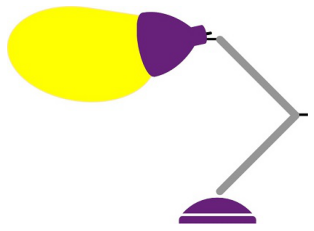

In [8]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from azure.cognitiveservices.speech import SpeechConfig, SpeechSynthesizer, AudioConfig
%matplotlib inline

# Get text to be spoken
response_text = 'Turning the light on.'

# Configure speech synthesis
speech_config = SpeechConfig(cog_key, cog_location)
speech_config.speech_synthesis_voice_name = 'en-US-ChristopherNeural'
speech_synthesizer = SpeechSynthesizer(speech_config)

# Transcribe text into speech
result = speech_synthesizer.speak_text(response_text)

# Display an appropriate image 
file_name = response_text.lower() + "jpg"
img = Image.open(os.path.join("data", "speech", file_name))
plt.axis('off')
plt. imshow(img)

Try changing the **response_text** variable to *Turning the light off.* (including the period at the end) and run the cell again to hear the result.

## Learn more

You've seen a very simple example of using the Speech cognitive service in this notebook. You can learn more about [speech-to-text](https://docs.microsoft.com/azure/cognitive-services/speech-service/index-speech-to-text) and [text-to-speech](https://docs.microsoft.com/azure/cognitive-services/speech-service/index-text-to-speech) in the Speech service documentation.